In [1]:
import nltk

In [2]:
from nltk.corpus.reader.plaintext import *
from nltk.corpus import stopwords
import collections
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

## import text files as a corpus

In [3]:
corpus = PlaintextCorpusReader('Z:\\Documents\\Son Reader\\Corpus', '.*\.txt')
corpus.fileids()

['2006 Q2.txt',
 '2006 Q3.txt',
 '2006 Q4.txt',
 '2007 Q2.txt',
 '2007 Q3.txt',
 '2007 Q4.txt',
 '2008 Q1.txt',
 '2008 Q2.txt',
 '2008 Q3.txt',
 '2008 Q4.txt',
 '2009 Q1.txt',
 '2009 Q2.txt',
 '2009 Q3.txt',
 '2009 Q4.txt',
 '2010 Q1.txt',
 '2010 Q2.txt',
 '2010 Q3.txt',
 '2010 Q4.txt',
 '2011 Q1.txt',
 '2011 Q2.txt',
 '2011 Q3.txt',
 '2011 Q4.txt',
 '2012 Q1.txt',
 '2012 Q2.txt',
 '2012 Q3.txt',
 '2012 Q4.txt',
 '2013 Q1.txt',
 '2013 Q2.txt',
 '2013 Q3.txt',
 '2013 Q4.txt',
 '2014 Q1.txt',
 '2014 Q2.txt',
 '2014 Q3.txt',
 '2014 Q4.txt',
 '2015 Q1.txt',
 '2015 Q2.txt',
 '2015 Q3.txt',
 '2015 Q4.txt',
 '2016 Q1.txt',
 '2016 Q2.txt',
 '2016 Q3.txt',
 '2016 Q4.txt',
 '2017 Q1.txt',
 '2017 Q2.txt']

In [4]:
for fname in corpus.fileids():
    print fname

2006 Q2.txt
2006 Q3.txt
2006 Q4.txt
2007 Q2.txt
2007 Q3.txt
2007 Q4.txt
2008 Q1.txt
2008 Q2.txt
2008 Q3.txt
2008 Q4.txt
2009 Q1.txt
2009 Q2.txt
2009 Q3.txt
2009 Q4.txt
2010 Q1.txt
2010 Q2.txt
2010 Q3.txt
2010 Q4.txt
2011 Q1.txt
2011 Q2.txt
2011 Q3.txt
2011 Q4.txt
2012 Q1.txt
2012 Q2.txt
2012 Q3.txt
2012 Q4.txt
2013 Q1.txt
2013 Q2.txt
2013 Q3.txt
2013 Q4.txt
2014 Q1.txt
2014 Q2.txt
2014 Q3.txt
2014 Q4.txt
2015 Q1.txt
2015 Q2.txt
2015 Q3.txt
2015 Q4.txt
2016 Q1.txt
2016 Q2.txt
2016 Q3.txt
2016 Q4.txt
2017 Q1.txt
2017 Q2.txt


## create a dictionary of Text where keys are file names

In [5]:
corpus_texts = {}
for fname in corpus.fileids():
    corpus_texts[fname[:7]] = nltk.Text(corpus.words(fname))
corpus_texts

{'2006 Q2': <Text: Thank you very much for the introduction ....>,
 '2006 Q3': <Text: I am Mr . Son of SoftBank ....>,
 '2006 Q4': <Text: I am Son from SoftBank . Thank you...>,
 '2007 Q2': <Text: I ' m Son of SoftBank Corp ....>,
 '2007 Q3': <Text: I ' m Son from SoftBank . Thank...>,
 '2007 Q4': <Text: I am Son from SoftBank , good afternoon...>,
 '2008 Q1': <Text: I am Son from SoftBank . Today this...>,
 '2008 Q2': <Text: I ' m Son from SOFTBANK . Good...>,
 '2008 Q3': <Text: I am Son from SoftBank . Recently ,...>,
 '2008 Q4': <Text: I am Son . Thank you very much...>,
 '2009 Q1': <Text: Hi . I ' m Son from SoftBank...>,
 '2009 Q2': <Text: I am Son of SoftBank , thank you...>,
 '2009 Q3': <Text: I ' m Son from SOFTBANK . Thank...>,
 '2009 Q4': <Text: I ' m Son , thank you very...>,
 '2010 Q1': <Text: My name is Son from SoftBank . Thank...>,
 '2010 Q2': <Text: Good afternoon , everyone . I am Son...>,
 '2010 Q3': <Text: Good afternoon . I am Son from SoftBank...>,
 '2010 Q4': <Tex

## create dictionaries of tokenized sents and words, text file names as keys

In [6]:
corpus_sents = {}
corpus_words = {}

for fname in corpus.fileids():
    print fname
    corpus_sents [fname[:7]] = sent_tokenize(corpus.raw(fname))
    corpus_words [fname[:7]] = word_tokenize(corpus.raw(fname))

2006 Q2.txt
2006 Q3.txt
2006 Q4.txt
2007 Q2.txt
2007 Q3.txt
2007 Q4.txt
2008 Q1.txt
2008 Q2.txt
2008 Q3.txt
2008 Q4.txt
2009 Q1.txt
2009 Q2.txt
2009 Q3.txt
2009 Q4.txt
2010 Q1.txt
2010 Q2.txt
2010 Q3.txt
2010 Q4.txt
2011 Q1.txt
2011 Q2.txt
2011 Q3.txt
2011 Q4.txt
2012 Q1.txt
2012 Q2.txt
2012 Q3.txt
2012 Q4.txt
2013 Q1.txt
2013 Q2.txt
2013 Q3.txt
2013 Q4.txt
2014 Q1.txt
2014 Q2.txt
2014 Q3.txt
2014 Q4.txt
2015 Q1.txt
2015 Q2.txt
2015 Q3.txt
2015 Q4.txt
2016 Q1.txt
2016 Q2.txt
2016 Q3.txt
2016 Q4.txt
2017 Q1.txt
2017 Q2.txt


In [7]:
corpus_sents.keys()

['2013 Q4',
 '2017 Q1',
 '2013 Q2',
 '2013 Q3',
 '2013 Q1',
 '2014 Q3',
 '2014 Q2',
 '2014 Q1',
 '2011 Q1',
 '2012 Q1',
 '2012 Q3',
 '2012 Q2',
 '2012 Q4',
 '2016 Q4',
 '2016 Q1',
 '2016 Q3',
 '2016 Q2',
 '2011 Q4',
 '2007 Q4',
 '2007 Q3',
 '2007 Q2',
 '2011 Q2',
 '2011 Q3',
 '2015 Q1',
 '2015 Q2',
 '2015 Q3',
 '2015 Q4',
 '2010 Q3',
 '2014 Q4',
 '2010 Q2',
 '2009 Q4',
 '2010 Q4',
 '2009 Q1',
 '2009 Q3',
 '2010 Q1',
 '2009 Q2',
 '2008 Q2',
 '2008 Q3',
 '2008 Q1',
 '2008 Q4',
 '2006 Q4',
 '2017 Q2',
 '2006 Q2',
 '2006 Q3']

## remove stopwords from both sets

In [8]:
english_stops = set(stopwords.words('english'))

In [9]:
pruned_sents = {}
pruned_words = {}

for key in corpus_sents:
    pruned_words [key] = [word for word in corpus_words[key] if word not in english_stops]
    

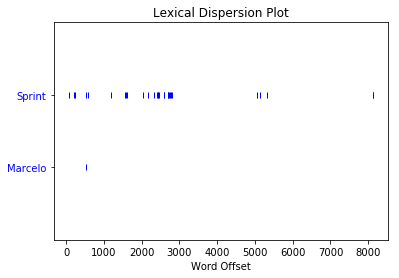

In [10]:
corpus_texts['2017 Q2'].dispersion_plot(["Sprint", "Marcelo"])

## get term frequency. use concordance to find related terms, i.e. "Sprint" and "Marcelo". use count to count, duh. Add up.

In [11]:
corpus_texts['2017 Q2'].concordance("Sprint", width=120, lines=29)

Displaying 29 of 29 matches:
re already aware of what the contents are . But for me , Sprint which is a SoftBank Group company and also T - Mobile in
 to the answer or conclusion when you see far ahead . So Sprint in U . S ., now that it ' s number four in the market wh
a strong position at this moment . So number four player Sprint and the number three player , T - Mobile . And getting t
 UNIQLO Fast Retailing . Of course , we had Marcelo from Sprint . Rajeev also there . Simon from ARM was also there . Ro
. But our common understanding of the board was that the Sprint or United States will be and has been the – whether it h
e like we have considered the merger with T - Mobile and Sprint , otherwise , it ' s really not easy to exceed Verizon a
th other things , that ' s IoT . From that perspective , Sprint is in the U . S . aware the value is the highest and ver
st and very important . And if we give up the control of Sprint in such important market , we would regret that in 5 yea
5 y

In [12]:
sprint_related = ["Sprint", "Marcelo", "T - Mobile"]
#corpus_texts['2017 Q2'].common_contexts(["problem", "headache"])
#corpus_texts['2017 Q2'].similar("problem")

In [13]:
corpus_texts['2017 Q2'].concordance("ARM", width=120, lines=29)

Displaying 11 of 11 matches:
 had Marcelo from Sprint . Rajeev also there . Simon from ARM was also there . Ron Fisher , Ken Miyauchi . All the dire
 ' s already one year we have spent that we have acquired ARM . And this company in the coming 20 years , we believe th
believe they will be shipping 1 trillion IoT chipset from ARM . That ' s our forecast internally right now . So 1 trill
 at far advanced position than the others because we have ARM . Originally speaking , when SoftBank Group decided to ac
h is a weapon that no other competitors would have . So , ARM ' s IoT and OneWeb would make Sprint different from just 
We don ' t have exclusivity of iPhone sales anymore , but ARM has dominant market position in terms of IoT chips and On
ion which is to keep Sprint in the group . While not only ARM and OneWeb , but also we have a SoftBank Vision Fund in t
dy but rapidly growth here in Japanese market . And now , ARM , which is a big purchase . Am I happy about this purchas
 we are mak

In [14]:
ARM_related = ["ARM", "chipset", "IOT", "chips"]

In [15]:
corpus_texts['2017 Q2'].concordance("Alibaba", width=120, lines=35)

Displaying 35 of 35 matches:
st year , the white portion here is the gain on sale of Alibaba share and also sale of Supercell shares was also or thi
, we should take that out and also derivative for using Alibaba share . The loss from the derivative was about ¥ 340 bi
Here , we ' ve been explaining about the derivatives on Alibaba but it ' s still also difficult to understand , I belie
rstand , I believe . So , so far , the cumulative , the Alibaba share , last year , we had a monetization partially . A
hich means the more you see the share price increase in Alibaba , then the more that you see the numbers here in the re
 you not happy seeing not increasing the share price in Alibaba ? No . I ' m so happy to see the share price increase i
 No . I ' m so happy to see the share price increase in Alibaba although it ' s going to be recorded as a derivative li
 share price . So , you see the share price increase in Alibaba then that you see more derivative liabilities again , s
is is a sad

>>> counts_from_wordtok = Counter(word_tokenize(webtext.raw('wine.txt')))
>>> counts_from_wordtok.most_common(10)
[(u'.', 2824), (u',', 1550), (u'a', 821), (u'and', 786), (u'the', 706), (u'***', 608), (u'-', 518), (u'of', 482), (u'but', 474), (u'I', 390)]

>>> counts_from_words = Counter(webtext.words('wine.txt'))
>>> counts_from_words.most_common(10)

In [16]:
def wordCount (text, words):
    cnt = Counter(word_tokenize(corpus.raw(text)))
    total = 0
    for key in cnt:
        if key in words:
            total += cnt[key]
    return total


>>> from nltk import word_tokenize
>>> from nltk.collocations import BigramCollocationFinder
>>> text = "obama says that obama says that the war is happening"
>>> finder = BigramCollocationFinder.from_words(word_tokenize(text))
>>> finder.items()[0:5]
[(('obama', 'says'), 2),
 (('says', 'that'), 2),
 (('is', 'happening'), 1),
 (('that', 'obama'), 1),
 (('that', 'the'), 1)]

In [19]:
a = collections.OrderedDict(sprint_count)
a.keys()

['2006 Q2',
 '2006 Q3',
 '2006 Q4',
 '2007 Q2',
 '2007 Q3',
 '2007 Q4',
 '2008 Q1',
 '2008 Q2',
 '2008 Q3',
 '2008 Q4',
 '2009 Q1',
 '2009 Q2',
 '2009 Q3',
 '2009 Q4',
 '2010 Q1',
 '2010 Q2',
 '2010 Q3',
 '2010 Q4',
 '2011 Q1',
 '2011 Q2',
 '2011 Q3',
 '2011 Q4',
 '2012 Q1',
 '2012 Q2',
 '2012 Q3',
 '2012 Q4',
 '2013 Q1',
 '2013 Q2',
 '2013 Q3',
 '2013 Q4',
 '2014 Q1',
 '2014 Q2',
 '2014 Q3',
 '2014 Q4',
 '2015 Q1',
 '2015 Q2',
 '2015 Q3',
 '2015 Q4',
 '2016 Q1',
 '2016 Q2',
 '2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2']

## figure out how to plot it.

x = np.arange(2,10,2)

y = x.copy()

x_ticks_labels = ['jan','feb','mar','apr','may']

fig, ax = plt.subplots(1,1) 

ax.plot(x,y)

### Set number of ticks for x-axis
ax.set_xticks(x)
### Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

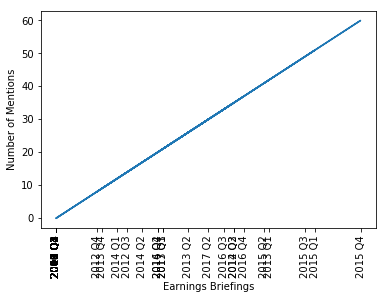

In [20]:
x = sprint_count.values()
y = sprint_count.values()
my_xticks = sprint_count.keys()
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.set_xticks(x)
ax.set_xticklabels(my_xticks, rotation="vertical", fontsize = 10)
#plt.xticks(x, my_xticks)

plt.ylabel('Number of Mentions')
plt.xlabel('Earnings Briefings')
#plt.plot(x)
plt.show()

x = np.array([0,1,2,3])

y = np.array([20,21,22,23])

my_xticks = ['John','Arnold','Mavis','Matt']

plt.xticks(x, my_xticks)

plt.plot(x, y)

plt.show()


In [21]:
a = sprint_count.keys()
print a
a.reverse()
print a

['2006 Q2', '2006 Q3', '2006 Q4', '2007 Q2', '2007 Q3', '2007 Q4', '2008 Q1', '2008 Q2', '2008 Q3', '2008 Q4', '2009 Q1', '2009 Q2', '2009 Q3', '2009 Q4', '2010 Q1', '2010 Q2', '2010 Q3', '2010 Q4', '2011 Q1', '2011 Q2', '2011 Q3', '2011 Q4', '2012 Q1', '2012 Q2', '2012 Q3', '2012 Q4', '2013 Q1', '2013 Q2', '2013 Q3', '2013 Q4', '2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1', '2015 Q2', '2015 Q3', '2015 Q4', '2016 Q1', '2016 Q2', '2016 Q3', '2016 Q4', '2017 Q1', '2017 Q2']
['2017 Q2', '2017 Q1', '2016 Q4', '2016 Q3', '2016 Q2', '2016 Q1', '2015 Q4', '2015 Q3', '2015 Q2', '2015 Q1', '2014 Q4', '2014 Q3', '2014 Q2', '2014 Q1', '2013 Q4', '2013 Q3', '2013 Q2', '2013 Q1', '2012 Q4', '2012 Q3', '2012 Q2', '2012 Q1', '2011 Q4', '2011 Q3', '2011 Q2', '2011 Q1', '2010 Q4', '2010 Q3', '2010 Q2', '2010 Q1', '2009 Q4', '2009 Q3', '2009 Q2', '2009 Q1', '2008 Q4', '2008 Q3', '2008 Q2', '2008 Q1', '2007 Q4', '2007 Q3', '2007 Q2', '2006 Q4', '2006 Q3', '2006 Q2']


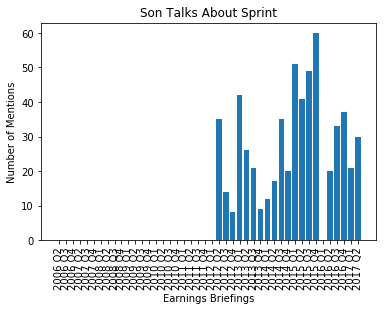

In [23]:
x = np.array(range(0,len(sprint_count.keys())))
y = sprint_count.values()
my_xticks = sprint_count.keys()
plt.xticks(x, my_xticks,  rotation="vertical")
plt.title("Son Talks About Sprint")
plt.ylabel('Number of Mentions')
plt.xlabel('Earnings Briefings')
plt.bar(x,y)
plt.show()

In [29]:
corpus_texts['2016 Q1']

<Text: Thank you very much . I am Son...>

In [30]:
corpus

<PlaintextCorpusReader in u'Z:\\Documents\\Son Reader\\Corpus'>

In [36]:
type(corpus_texts['2016 Q1'])

nltk.text.Text

In [39]:
test1 = corpus_texts['2016 Q1']
test1

<Text: Thank you very much . I am Son...>

In [42]:
pruned_words['2016 Q1']

[u'Thank',
 u'much',
 u'.',
 u'I',
 u'Son',
 u'SoftBank',
 u'.',
 u'Recently',
 u'every',
 u'day',
 u'morning',
 u'late',
 u'I',
 u'much',
 u'focused',
 u'mobile',
 u'phone',
 u'really',
 u'fills',
 u'mind',
 u'.',
 u'Now',
 u',',
 u'I',
 u'look',
 u'back',
 u'Vodafone',
 u'KK',
 u',',
 u'happy',
 u'could',
 u'acquire',
 u'Vodafone',
 u'KK',
 u'.',
 u'I',
 u'think',
 u'great',
 u'timing',
 u'I',
 u'think',
 u'lucky',
 u'able',
 u'acquire',
 u'Vodafone',
 u'KK',
 u'.',
 u'It',
 u"'s",
 u'great',
 u'company',
 u'.',
 u'I',
 u'think',
 u'one',
 u'million',
 u'opportunity',
 u'us',
 u'.',
 u'Of',
 u'course',
 u',',
 u'competitors',
 u'great',
 u'competitors',
 u"'re",
 u'working',
 u'hard',
 u"'s",
 u'going',
 u'easy',
 u'competition',
 u'easy',
 u'race',
 u',',
 u'fully',
 u'know',
 u'.',
 u'But',
 u'three',
 u'years',
 u',',
 u'five',
 u'years',
 u'10',
 u'years',
 u',',
 u'I',
 u'think',
 u'fully',
 u'capable',
 u'competing',
 u'I',
 u'feeling',
 u'confident',
 u'recently',
 u',',
 u'ke

In [52]:
fdist = nltk.FreqDist(pruned_words['2016 Q1'])

In [53]:
fdist

FreqDist({u'!': 11,
          u'%': 3,
          u"'06": 1,
          u"'d": 10,
          u"'ll": 2,
          u"'m": 2,
          u"'re": 3,
          u"'s": 22,
          u',': 196,
          u'.': 283,
          u'1': 1,
          u'1,500': 1,
          u'1.166': 1,
          u'1.2': 2,
          u'1.5': 1,
          u'10': 2,
          u'10,000': 2,
          u'100': 4,
          u'104.3': 1,
          u'12': 1,
          u'13': 1,
          u'136': 1,
          u'15': 1,
          u'156,000': 1,
          u'1st': 2,
          u'2': 1,
          u'20': 3,
          u'20,000': 1,
          u'2003': 1,
          u'2007': 1,
          u'21st': 2,
          u'23,000': 1,
          u'24': 2,
          u'25.9': 2,
          u'26': 2,
          u'27': 1,
          u'27th': 1,
          u'29.3': 1,
          u'2G': 2,
          u'3.1': 1,
          u'30': 3,
          u'39': 1,
          u'3G': 7,
          u'3G-network': 1,
          u'44,000': 1,
          u'46,000': 2,
          u'47':

In [54]:
fdist["gain"]

3

In [55]:
print('Count of the maximum appearing token "',fdist.max(),'" : ', fdist[fdist.max()])

('Count of the maximum appearing token "', u'.', '" : ', 283)


In [56]:
print('Total Number of distinct tokens in the bag : ', fdist.N())

('Total Number of distinct tokens in the bag : ', 3095)


In [57]:
print('Following are the most common 10 words in the bag')
print(fdist.most_common(10))

Following are the most common 10 words in the bag
[(u'.', 283), (u',', 196), (u'And', 61), (u'So', 51), (u'I', 33), (u'terms', 32), (u'like', 25), (u'We', 24), (u'Vodafone', 23), (u"'s", 22)]


In [59]:
print('Frequency Distribution')
print(fdist.tabulate())

Frequency Distribution
                    .                     ,                   And                    So                     I                 terms                  like                    We              Vodafone                    's                 would                 Yahoo                number               network               billion                 sales               content                   one                   see             customers                income               company                  year                mobile                   But                 Japan                 fully               already                    IP                   yen             broadband                 Group               quarter                 first                   The             operating                  loan                    In              business                  four                   use                     !                 years                 Talki          

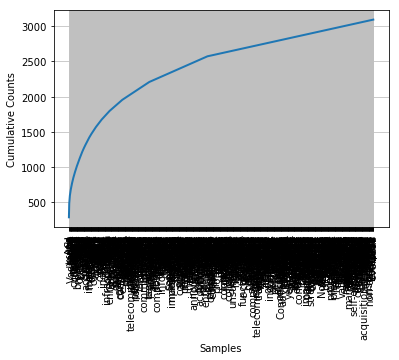

In [60]:
fdist.plot(cumulative=True)

## From Safari Course
##### https://www.safaribooksonline.com/library/view/natural-language-processing/9781787289321/24f908e9-db4f-415d-b7c4-14c0047ed19b.xhtml

In [5]:
from nltk.corpus import wordnet as wn

In [62]:
chair = 'chair'

chair_synsets = wn.synsets(chair)
print('Synsets/Senses of Chair :', chair_synsets, '\n\n')

('Synsets/Senses of Chair :', [Synset('chair.n.01'), Synset('professorship.n.01'), Synset('president.n.04'), Synset('electric_chair.n.01'), Synset('chair.n.05'), Synset('chair.v.01'), Synset('moderate.v.01')], '\n\n')


In [63]:
for synset in chair_synsets:
    print(synset, ': ')
    print('Definition: ', synset.definition())
    print('Lemmas/Synonymous words: ', synset.lemma_names())
    print('Example: ', synset.examples(), '\n')

(Synset('chair.n.01'), ': ')
('Definition: ', u'a seat for one person, with a support for the back')
('Lemmas/Synonymous words: ', [u'chair'])
('Example: ', [u'he put his coat over the back of the chair and sat down'], '\n')
(Synset('professorship.n.01'), ': ')
('Definition: ', u'the position of professor')
('Lemmas/Synonymous words: ', [u'professorship', u'chair'])
('Example: ', [u'he was awarded an endowed chair in economics'], '\n')
(Synset('president.n.04'), ': ')
('Definition: ', u'the officer who presides at the meetings of an organization')
('Lemmas/Synonymous words: ', [u'president', u'chairman', u'chairwoman', u'chair', u'chairperson'])
('Example: ', [u'address your remarks to the chairperson'], '\n')
(Synset('electric_chair.n.01'), ': ')
('Definition: ', u'an instrument of execution by electrocution; resembles an ordinary seat for one person')
('Lemmas/Synonymous words: ', [u'electric_chair', u'chair', u'death_chair', u'hot_seat'])
('Example: ', [u'the murderer was sentenced 

#### Hyponym -- a word of a more specific meaning than a more generic such as bat -- ex: cricket bat, baseball bat, carnivorous bat, squash racket.
#### Hypernym -- a more general form or word of the same concept.

In [64]:
woman = wn.synset('woman.n.02')
bed = wn.synset('bed.n.01')

In [65]:
print(woman.hypernyms())
woman_paths = woman.hypernym_paths()

[Synset('female.n.02')]


In [66]:
print(woman_paths)

[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('causal_agent.n.01'), Synset('person.n.01'), Synset('female.n.02'), Synset('woman.n.02')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('person.n.01'), Synset('female.n.02'), Synset('woman.n.02')]]


In [68]:
from __future__ import print_function
for idx, path in enumerate(woman_paths):  
    print('\n\nHypernym Path :', idx + 1)
    
for synset in path:  
    print(synset.name(), ', ', end='')



Hypernym Path : 1


Hypernym Path : 2
entity.n.01 , physical_entity.n.01 , object.n.01 , whole.n.02 , living_thing.n.01 , organism.n.01 , person.n.01 , female.n.02 , woman.n.02 , 

In [69]:
types_of_beds = bed.hyponyms()
print('\n\nTypes of beds(Hyponyms): ', types_of_beds)



Types of beds(Hyponyms):  [Synset('berth.n.03'), Synset('built-in_bed.n.01'), Synset('bunk.n.03'), Synset('bunk_bed.n.01'), Synset('cot.n.03'), Synset('couch.n.03'), Synset('deathbed.n.02'), Synset('double_bed.n.01'), Synset('four-poster.n.01'), Synset('hammock.n.02'), Synset('marriage_bed.n.01'), Synset('murphy_bed.n.01'), Synset('plank-bed.n.01'), Synset('platform_bed.n.01'), Synset('sickbed.n.01'), Synset('single_bed.n.01'), Synset('sleigh_bed.n.01'), Synset('trundle_bed.n.01'), Synset('twin_bed.n.01'), Synset('water_bed.n.01')]


##### lemmas -- words as we humans use them

In [70]:
print(sorted(set(lemma.name() for synset in types_of_beds for lemma in synset.lemmas())))

[u'Murphy_bed', u'berth', u'built-in_bed', u'built_in_bed', u'bunk', u'bunk_bed', u'camp_bed', u'cot', u'couch', u'deathbed', u'double_bed', u'four-poster', u'hammock', u'marriage_bed', u'plank-bed', u'platform_bed', u'sack', u'sickbed', u'single_bed', u'sleigh_bed', u'truckle', u'truckle_bed', u'trundle', u'trundle_bed', u'twin_bed', u'water_bed']


#####  Polysemy means many possible meanings of a word or a phrase.

In [71]:
type = 'n'

In [72]:
synsets = wn.all_synsets(type)

In [73]:
lemmas = []
for synset in synsets:  
    for lemma in synset.lemmas():    
        lemmas.append(lemma.name())

In [74]:
lemmas = set(lemmas)

In [75]:
count = 0
for lemma in lemmas:  
    count = count + len(wn.synsets(lemma, type))

In [76]:
print('Total distinct lemmas: ', len(lemmas))
print('Total senses :',count)
print('Average Polysemy of ', type,': ' , count/len(lemmas))

Total distinct lemmas:  119034
Total senses : 152763
Average Polysemy of  n :  1


In [77]:
namesList = ['Tuffy','Ali','Nysha','Tim' ]
sentence = 'My dog sleeps on sofa'

In [82]:
names = ';'.join(namesList)
print(names)

Tuffy;Ali;Nysha;Tim


In [84]:
wordList = sentence.split(' ')
print(wordList)

['My', 'dog', 'sleeps', 'on', 'sofa']


In [85]:
additionExample = 'ganehsa' + 'ganesha' + 'ganesha'
multiplicationExample = 'ganesha' * 2
print('Text Additions :', additionExample)
print('Text Multiplication :', multiplicationExample)

Text Additions : ganehsaganeshaganesha
Text Multiplication : ganeshaganesha


In [86]:
str = 'NLTK Dolly Python'
replaced = str.replace('Dolly', 'Dorothy')
print('Replaced String:', replaced)

Replaced String: NLTK Dorothy Python


In [6]:
from PyPDF2 import PdfFileReader

In [90]:
pdf_file = open("pdf_test.pdf", 'rb')
read_pdf = PdfFileReader(pdf_file)

NameError: name 'password' is not defined

In [95]:
def getTextPDF(pdfFileName, password = ''):
    pdf_file = open(pdfFileName, 'rb')
    read_pdf = PdfFileReader(pdf_file)
    if password != '':
        read_pdf.decrypt(password)
    text = []
    for i in range(0,read_pdf.getNumPages()-1):
        text.append(read_pdf.getPage(i).extractText())
    
    return '\n'.join(text)

In [99]:
pdfFile = "pdf_test.pdf"
print('PDF 1: \n',getTextPDF(pdfFile))

PDF 1: 
 Page 1
Q1 2008 Earnings Call
Company Participants
Masayoshi Son, Chairman and Chief Executive Officer
Other Participants
Daisaku Masuno
MANAGEMENT DISCUSSION SECTION
Operator
Thank you very much for waiting ladies and gentlemen. We'd like to now start the announcement of the Earnings
Results for the First Quarter Ended June 30th 2008.
First of all, I'd like to introduce the representatives from SoftBank Corp. From left we have Mr. Son, Chairman and
CEO. And next to him Mr. Kasai, Director and General Manager of Finance and Group Management Mr. Goto.
And at the back from left we have Ms. Kimiwada, General Manager of Accounting and Internal Control and next to her
Senior Vice President, CFO and Director of SoftBank Mobile Corp Mr. Fujihara. And, lastly, Executive Vice President,
CTO and Director of SoftBank Mobile Corp. Mr. Miyakawa.
This meeting is being broadcast over the Internet and also can be heard by telephone.
Now I'd like to invite Mr. Son, Chairman and CEO to present t

#### How to read files into a directory

In [113]:
def getText(txtFileName):  
    file = open(txtFileName, 'r')  
    return file.read()

In [119]:
newCorpusDir = 'Z:\\Documents\\Son Reader\\Corpus\\'

In [117]:
os.chdir(r'Z:\\Documents\\Son Reader\\Corpus')
open('2006 Q1.txt')

<open file '2006 Q1.txt', mode 'r' at 0x0000000027F988A0>

In [118]:
getText('Z:\\Documents\\Son Reader\\Corpus\\2006 Q1.txt')

"Thank you very much. I am Son of SoftBank. Recently every day from the morning until late I am very much focused\non the mobile phone that really fills up my mind. Now, I look back the Vodafone KK, we are very happy that we could\nacquire Vodafone KK. I think it was a great timing and I think we were very lucky to be able to acquire Vodafone KK.\nIt's a great company. I think it was one in a million opportunity for us.\nOf course, the competitors are great competitors and they're working very hard so it's not going to be easy competition\nor easy race, we fully know that. But in three years, five years or 10 years, I think that we are fully capable of\ncompeting and I am feeling more and more confident recently about, the key word now is adult SoftBank or mature\nSoftBank. So we're not going to be anything outrageous. But the four issues, or four challenges are network coverage\nenhancement to make sure that we have the coverage or so that you can have the connection over the time. Th

In [122]:
files = []
for filename in os.listdir(newCorpusDir):
    this_file = getText(newCorpusDir+filename)
    files.append(this_file) 
    

#### Creating a new corpus

In [125]:
newCorpus = PlaintextCorpusReader(newCorpusDir, '.*')

#### Getting at all the words, sentences and paras in your corpus

In [133]:
print(newCorpus.words())
print(newCorpus.sents(newCorpus.fileids()[0]))
print(newCorpus.paras(newCorpus.fileids()[0]))

[u'Thank', u'you', u'very', u'much', u'.', u'I', u'am', ...]
[[u'Thank', u'you', u'very', u'much', u'.'], [u'I', u'am', u'Son', u'of', u'SoftBank', u'.'], ...]
[[[u'Thank', u'you', u'very', u'much', u'.'], [u'I', u'am', u'Son', u'of', u'SoftBank', u'.'], [u'Recently', u'every', u'day', u'from', u'the', u'morning', u'until', u'late', u'I', u'am', u'very', u'much', u'focused', u'on', u'the', u'mobile', u'phone', u'that', u'really', u'fills', u'up', u'my', u'mind', u'.'], [u'Now', u',', u'I', u'look', u'back', u'the', u'Vodafone', u'KK', u',', u'we', u'are', u'very', u'happy', u'that', u'we', u'could', u'acquire', u'Vodafone', u'KK', u'.'], [u'I', u'think', u'it', u'was', u'a', u'great', u'timing', u'and', u'I', u'think', u'we', u'were', u'very', u'lucky', u'to', u'be', u'able', u'to', u'acquire', u'Vodafone', u'KK', u'.'], [u'It', u"'", u's', u'a', u'great', u'company', u'.'], [u'I', u'think', u'it', u'was', u'one', u'in', u'a', u'million', u'opportunity', u'for', u'us', u'.'], [u'Of', u

In [127]:
newCorpus

<PlaintextCorpusReader in u'Z:\\Documents\\Son Reader\\Corpus'>

In [130]:
for f in newCorpus.fileids():
    print (f)

2006 Q1.txt
2006 Q2.txt
2006 Q3.txt
2006 Q4.txt
2007 Q2.txt
2007 Q3.txt
2007 Q4.txt
2008 Q1.txt
2008 Q2.txt
2008 Q3.txt
2008 Q4.txt
2009 Q1.txt
2009 Q2.txt
2009 Q3.txt
2009 Q4.txt
2010 Q1.txt
2010 Q2.txt
2010 Q3.txt
2010 Q4.txt
2011 Q1.txt
2011 Q2.txt
2011 Q3.txt
2011 Q4.txt
2012 Q1.txt
2012 Q2.txt
2012 Q3.txt
2012 Q4.txt
2013 Q1.txt
2013 Q2.txt
2013 Q3.txt
2013 Q4.txt
2014 Q1.txt
2014 Q2.txt
2014 Q3.txt
2014 Q4.txt
2015 Q1.txt
2015 Q2.txt
2015 Q3.txt
2015 Q4.txt
2016 Q1.txt
2016 Q2.txt
2016 Q3.txt
2016 Q4.txt
2017 Q1.txt
2017 Q2.txt


HTML Parsing

In [7]:
from bs4 import BeautifulSoup


In [138]:
html_doc = open('Z:\\Documents\\Son Reader\\Bloomberg2.html', 'r').read()
soup = BeautifulSoup(html_doc, 'html.parser')



Full text HTML Stripped:



      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    
      .bvp-bvp_pl-971163-dimensions {
        width: 1280px;
        height: 720px;
      }

      .bvp-bvp_pl-971163-dimensions.vjs-fluid {
        padding-top: 56.25%;
      }
    



        {"@context":"http://schema.org","@type":"NewsArticle","author":[{"@type":"Person","name":"Ian King"},{"@type":"Person","name":"Pavel Alpeyev"},{"@type":"Person","name":"Yuki Furukawa"}],"dateCreated":"2017-12-12T22:03:38.960Z","dateModified":"2017-12-13T00:34:08.075Z","datePublished":"2017-12-12T22:03:38.960Z","description":"Toshiba Corp. and Western Digital Corp. announced the end to a months-long legal spat that had threatened to derail the $18 billion sale of Toshiba’s flash-memory business and cut the U.S. company off from a future supply of vital new products.","headline":"Toshiba, Western Digital Settle Fight Over Chip Unit Sale",
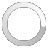

In [139]:
print('\n\nFull text HTML Stripped:')
print(soup.get_text())

In [140]:
print('Accessing the <title> tag :', end=' ')
print(soup.title)

Accessing the <title> tag : <title>Toshiba, Western Digital Settle Fight Over Chip Unit Sale - Bloomberg</title>


In [141]:
print('Accessing the text of <H1> tag :', end=' ')
print(soup.h1.string)

Accessing the text of <H1> tag : None


In [143]:
print('\nAccessing all occurences of the <p> tag :')
for p in soup.find_all('p'):  
    print(p.string)


Accessing all occurences of the <p> tag :
Connecting decision makers to a dynamic network of information, people and ideas, Bloomberg quickly and accurately delivers business and financial information, news and insight around the world.
None
None
None
Connecting decision makers to a dynamic network of information, people and ideas, Bloomberg quickly and accurately delivers business and financial information, news and insight around the world.
None
None
None
This is a modal window.
None
None
None
“As we at some point in the process moved down the litigation path, that was not our preferred path, that was not what we wanted to do,” Steve Milligan, Western Digital’s chief executive officer, said in a conference call. “We’re very pleased to be able to resolve this and put it behind us.”
Western Digital had injected itself into Toshiba’s attempts to find a buyer, tried to join a rival bidding consortium and, according to the Toshiba side, made the whole process more difficult. For Milligan

### tokens

In [8]:
from nltk.tokenize import LineTokenizer, SpaceTokenizer, TweetTokenizer 
from nltk import word_tokenize

In [149]:
lTokenizer = LineTokenizer()
print("Line tokenizer output :",
      lTokenizer.tokenize("My name is Maximus Decimus Meridius, commander of the Armies of the North, General of the Felix Legions and loyal servant to the true emperor, Marcus Aurelius. \nFather to a murdered son, husband to a murdered wife. \nAnd I will have my vengeance, in this life or the next."))

Line tokenizer output : ['My name is Maximus Decimus Meridius, commander of the Armies of the North, General of the Felix Legions and loyal servant to the true emperor, Marcus Aurelius. ', 'Father to a murdered son, husband to a murdered wife. ', 'And I will have my vengeance, in this life or the next.']


In [150]:
rawText = "By 11 o'clock on Sunday, the doctor shall open the dispensary."
sTokenizer = SpaceTokenizer()
print("Space Tokenizer output :",sTokenizer.tokenize(rawText))

Space Tokenizer output : [u'By', u'11', u"o'clock", u'on', u'Sunday,', u'the', u'doctor', u'shall', u'open', u'the', u'dispensary.']


In [151]:
print("Word Tokenizer output :", word_tokenize(rawText))

Word Tokenizer output : ['By', '11', "o'clock", 'on', 'Sunday', ',', 'the', 'doctor', 'shall', 'open', 'the', 'dispensary', '.']


In [152]:
tTokenizer = TweetTokenizer()
print("Tweet Tokenizer output :",tTokenizer.tokenize("This is a cooool #dummysmiley: :-) :-P <3"))

Tweet Tokenizer output : [u'This', u'is', u'a', u'cooool', u'#dummysmiley', u':', u':-)', u':-P', u'<3']


### stems

In [9]:
from nltk import PorterStemmer, LancasterStemmer, word_tokenize

In [154]:
raw = "My name is Maximus Decimus Meridius, commander of the Armies of the North, General of the Felix Legions and loyal servant to the true emperor, Marcus Aurelius. Father to a murdered son, husband to a murdered wife. And I will have my vengeance, in this life or the next."
tokens = word_tokenize(raw)

In [155]:
porter = PorterStemmer()
pStems = [porter.stem(t) for t in tokens]
print(pStems)

[u'My', u'name', u'is', u'Maximu', u'Decimu', u'Meridiu', u',', u'command', u'of', u'the', u'Armi', u'of', u'the', u'North', u',', u'Gener', u'of', u'the', u'Felix', u'Legion', u'and', u'loyal', u'servant', u'to', u'the', u'true', u'emperor', u',', u'Marcu', u'Aureliu', u'.', u'Father', u'to', u'a', u'murder', u'son', u',', u'husband', u'to', u'a', u'murder', u'wife', u'.', u'And', u'I', u'will', u'have', u'my', u'vengeanc', u',', u'in', u'thi', u'life', u'or', u'the', u'next', u'.']


In [158]:
lancaster = LancasterStemmer()
lStems = [lancaster.stem(t) for t in tokens]
print(lStems)

['my', 'nam', 'is', 'maxim', 'decim', 'meridi', ',', 'command', 'of', 'the', u'army', 'of', 'the', 'nor', ',', 'gen', 'of', 'the', 'felix', 'leg', 'and', 'loy', 'serv', 'to', 'the', 'tru', 'emp', ',', 'marc', 'aureli', '.', 'fath', 'to', 'a', 'murd', 'son', ',', 'husband', 'to', 'a', 'murd', 'wif', '.', 'and', 'i', 'wil', 'hav', 'my', u'veng', ',', 'in', 'thi', 'lif', 'or', 'the', 'next', '.']


### lemmas

In [10]:
from nltk import WordNetLemmatizer

In [160]:
tokens = word_tokenize(raw)

In [162]:
print (pStems)

[u'My', u'name', u'is', u'Maximu', u'Decimu', u'Meridiu', u',', u'command', u'of', u'the', u'Armi', u'of', u'the', u'North', u',', u'Gener', u'of', u'the', u'Felix', u'Legion', u'and', u'loyal', u'servant', u'to', u'the', u'true', u'emperor', u',', u'Marcu', u'Aureliu', u'.', u'Father', u'to', u'a', u'murder', u'son', u',', u'husband', u'to', u'a', u'murder', u'wife', u'.', u'And', u'I', u'will', u'have', u'my', u'vengeanc', u',', u'in', u'thi', u'life', u'or', u'the', u'next', u'.']


In [164]:
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in tokens]
print(lemmas)

['My', 'name', 'is', 'Maximus', 'Decimus', 'Meridius', ',', 'commander', 'of', 'the', 'Armies', 'of', 'the', 'North', ',', 'General', 'of', 'the', 'Felix', 'Legions', 'and', 'loyal', 'servant', 'to', 'the', 'true', 'emperor', ',', 'Marcus', 'Aurelius', '.', 'Father', 'to', 'a', 'murdered', 'son', ',', 'husband', 'to', 'a', 'murdered', 'wife', '.', 'And', 'I', 'will', 'have', 'my', 'vengeance', ',', 'in', 'this', 'life', 'or', 'the', 'next', '.']


### stop words

In [165]:
print(corpus.fileids())

['2006 Q2.txt', '2006 Q3.txt', '2006 Q4.txt', '2007 Q2.txt', '2007 Q3.txt', '2007 Q4.txt', '2008 Q1.txt', '2008 Q2.txt', '2008 Q3.txt', '2008 Q4.txt', '2009 Q1.txt', '2009 Q2.txt', '2009 Q3.txt', '2009 Q4.txt', '2010 Q1.txt', '2010 Q2.txt', '2010 Q3.txt', '2010 Q4.txt', '2011 Q1.txt', '2011 Q2.txt', '2011 Q3.txt', '2011 Q4.txt', '2012 Q1.txt', '2012 Q2.txt', '2012 Q3.txt', '2012 Q4.txt', '2013 Q1.txt', '2013 Q2.txt', '2013 Q3.txt', '2013 Q4.txt', '2014 Q1.txt', '2014 Q2.txt', '2014 Q3.txt', '2014 Q4.txt', '2015 Q1.txt', '2015 Q2.txt', '2015 Q3.txt', '2015 Q4.txt', '2016 Q1.txt', '2016 Q2.txt', '2016 Q3.txt', '2016 Q4.txt', '2017 Q1.txt', '2017 Q2.txt']


In [166]:
Q2_words = corpus.words('2006 Q2.txt')
words_filtered = [e for e in Q2_words if len(e) >= 3]

In [167]:
stopwords = nltk.corpus.stopwords.words('english')
words = [w for w in words_filtered if w.lower() not in stopwords]

In [169]:
fdistPlain = nltk.FreqDist(words)
fdist = nltk.FreqDist(Q2_words)

In [171]:
print('Following are the most common 10 words in the bag')
print(fdist.most_common(10))
print('Following are the most common 10 words in the bag minus the stopwords')
print(fdistPlain.most_common(10))

Following are the most common 10 words in the bag
[(u',', 369), (u'the', 343), (u'.', 259), (u'of', 169), (u'and', 158), (u'we', 148), (u'is', 105), (u'in', 105), (u'to', 93), (u'that', 82)]
Following are the most common 10 words in the bag minus the stopwords
[(u'number', 35), (u'income', 29), (u'terms', 27), (u'operating', 27), (u'000', 27), (u'increase', 24), (u'mobile', 23), (u'net', 22), (u'Yahoo', 22), (u'year', 21)]


### edit distance

In [11]:
from nltk.metrics.distance import edit_distance

In [174]:
def my_edit_distance(str1, str2):
    m=len(str1)+1
    n=len(str2)+1
    table = {}    
    for i in range(m): 
        table[i,0]=i    
    for j in range(n): 
        table[0,j]=j
    for i in range(1, m):  
        for j in range(1, n):    
            cost = 0 if str1[i-1] == str2[j-1] else 1    
            table[i,j] = min(table[i, j-1]+1, table[i-1, j]+1, table[i-1, j-1]+cost)
    return table[i,j]

In [176]:
print("Our Algorithm :",my_edit_distance("sand", "ands"))
print("NLTK Algorithm :",edit_distance("sand", "ands"))

Our Algorithm : 2
NLTK Algorithm : 2


In [181]:
Q2 = corpus.raw("2006 Q2.txt")
Q3 = corpus.raw("2006 Q3.txt")

In [183]:
Q2_clean = Q2.replace(",", "").replace("\n", "").replace('.', '').replace('"', '').replace("!","").replace("?","").lower()
Q3_clean = Q3.replace(",", "").replace("\n", "").replace('.', '').replace('"', '').replace("!","").replace("?","").lower()

In [184]:
Q2_words = Q2_clean.split(" ")
print("Q2 words :", Q2_words)
Q3_words = Q3_clean.split(" ")
print("Q3 words :", Q3_words)

Q2 words : [u'thank', u'you', u'very', u'much', u'for', u'the', u'introduction', u'i', u'am', u'son', u'of', u'softbank', u'now', u'the', u'number', u'portability', u'started', u'a', u'week', u'ago', u'and\rat', u'the', u'beginning', u'there', u'were', u'a', u'lot', u'of', u'confusion', u'with', u'system', u'failures', u'and', u'related', u'issues', u'i', u'would', u'like', u'to', u'take', u'his\ropportunity', u'to', u'apologize', u'for', u'any', u'inconveniences', u'that', u'you', u'had', u'and', u'after', u'the', u'holiday', u'i', u'think', u'that', u'the', u"customers'\rprocedures", u'have', u'become', u'possible', u'and', u"it's", u'going', u'to', u'move', u'at', u'the', u'end', u'of', u'this', u'week\rnot', u'only', u'the', u'new', u'customers', u'but', u'the', u'existing', u"customers'", u'procedures', u'are', u'started', u'and', u'we', u'are', u'during', u'a', u'lot', u'of', u'our\rprocedures', u'of', u'changes', u'but', u'starting', u'with', u'today', u'for', u'the', u'existing

In [185]:
Q2_vocab = set(Q2_words)
print("Q2 vocabulary :", Q2_vocab)
Q3_vocab = set(Q3_words)
print("Q3 vocabulary :", Q3_vocab)

Q2 vocabulary : set([u'all', u'registered\ruser', u'mnp', u'consolidated', u'both', u'results', u'yellow', u'existing', u'four', u'means\rthat', u'was\r28000', u'bank\rand', u'go', u'functioned', u'issues', u'optical', u'increase', u'21st', u'tv', u'gain\rwas', u'concerned', u'incur\ra', u'to', u'charge', u'thinnest', u'thinness', u'multicast', u'under', u'is\rthe', u'area\rand', u'sorry', u'enjoying', u'activities', u'fax', u'very', u'refinance', u'put-out', u'every', u'sales\rfor', u'22000', u'the\rapplication', u'encounter', u'explanatory', u'1700', u"we'll", u'announcing', u'did', u'cause', u'notes', u'registered', u'these\rthe', u'try', u'item', u'it\rat', u'expenditure\rwe', u'three\rtimes', u'[ph]', u'businesses', u'be\rlower', u'293', u'added', u'equipments', u'enjoy', u'pursue', u'too', u'au-12', u'thin', u'trend', u'phones', u'myspace', u'1125', u'past', u'fold', u'second', u'was\rachieved', u'video', u'enhancement', u'picked', u'than\rmobile', u'7th', u'further', u'investmen

In [186]:
common_vocab = Q2_vocab & Q3_vocab
print("Common Vocabulary :",common_vocab)

Common Vocabulary : set([u'all', u'consolidated', u'results', u'month', u'four', u'go', u'graph', u'to', u'charge', u'quarterly', u'me', u'very', u'refinance', u'every', u'difference', u"we'll", u'try', u'item', u'announced', u'[ph]', u'be\rlower', u'phones', u'past', u'second', u'enhancement', u'further', u'investment', u'even', u'what', u'access', u'version', u'above', u'new', u'net', u'46000', u'3g', u'method', u'full', u'never', u'here', u'china', u'others', u'november', u'b2b', u'705sh', u"i'm", u'ago', u'total', u'use', u'from', u'would', u'two', u'next', u'comparing', u'camera', u'therefore', u'until', u'today', u'more', u'on', u'started', u'operators', u'yahoo', u'is\rthe', u'customer', u'stabilized', u'portability', u'this', u'can', u'following', u'making', u'my', u'example', u'indicated', u'december', u'slim', u'share', u'high', u'something', u'sense', u'made', u'end', u'provide', u'1', u'far', u'fourth', u'ordinary', u'you\rcan', u'vodafone', u'may', u'after', u'alibaba', u'

#### regex

In [12]:
import re

In [13]:
def text_match(text,patterns):
    if re.search(patterns, text):
        return ("Found a match")
    else:
        return("No match")

### zero or more (*) one or more (+), and zero or one (?) 

In [15]:
print(text_match("ac", "ab?"))    
print(text_match("abc", "ab?"))
print(text_match("abbc", "ab?"))

Found a match
Found a match
Found a match


In [192]:
print(text_match("ac", "ab*"))
print(text_match("abc", "ab*"))
print(text_match("abbc", "ab*"))

Found a match
Found a match
Found a match


In [193]:
print(text_match("ac", "ab+"))
print(text_match("abc", "ab+"))
print(text_match("abbc", "ab+"))

No match
Found a match
Found a match


In [16]:
print(text_match("abbc", "ab{2}"))

Found a match


In [17]:
print(text_match("aabbbbc", "ab{3,5}?"))

Found a match


### starts with (^) and ends with ($)

In [18]:
print("Pattern to test starts and ends with")
print(text_match("abbc", "^a.*c$"))

Pattern to test starts and ends with
Found a match


### \w stands for any alphanumeric character and underscore

In [19]:
print("Begin with a word")
print(text_match("Tuffy eats pie, Loki eats peas!", "^\w+"))

Begin with a word
Found a match


###  \s is all whitespace characters. \S is punctuation

In [20]:
print("End with a word and optional punctuation")
print(text_match("Tuffy eats pie, Loki eats peas!", "\w+\S*?$"))

End with a word and optional punctuation
Found a match


### \b matches an empty string at the beginning or end of a word. 
### \B will match inside the word (in this case character u)

In [21]:
print("Finding a word which contains character, not start or end of the word")
print(text_match("Tuffy eats pie, Loki eats peas!", "\Bu\B"))

Finding a word which contains character, not start or end of the word
Found a match


### finditer

In [27]:
text = 'Diwali is a festival of lights, Holi is a festival of colors!'
pattern = 'festival'

In [28]:
for match in re.finditer(pattern, text):  
    s = match.start()  
    e = match.end()  
    print('Found "%s" at %d:%d' % (text[s:e], s, e))

Found "festival" at 12:20
Found "festival" at 42:50


### ignore case

#### re.search(pattern, string, flags=re.IGNORECASE)

###  \d denotes digits starting from 0 to 9

In [29]:
url= "http://www.telegraph.co.uk/formula-1/2017/10/28/mexican-grand-prix-2017-time-does-start-tv-channel-odds-lewis1/"
date_regex = '/(\d{4})/(\d{1,2})/(\d{1,2})/'

### All the three components of the date are marked inside the group notation ()

In [30]:
print("Date found in the URL :", re.findall(date_regex, url))

('Date found in the URL :', [('2017', '10', '28')])


###  set of characters notation []

In [31]:
def is_allowed_specific_char(string):  
    charRe = re.compile(r'[^a-zA-Z0-9.]')  
    string = charRe.search(string)  
    return not bool(string)

### The pattern enclosed inside the squared brackets means: not (^) the range of characters a-z, A-Z, 0-9, or .. Effectively, this is an OR operation of all things enclosed by the squared brackets.

In [32]:
print(is_allowed_specific_char("ABCDEFabcdef123450."))
print(is_allowed_specific_char("*&%@#!}{"))

True
False


### substitution

In [33]:
street = '21 Ramkrishna Road'
print(re.sub('Road', 'Rd', street))

21 Ramkrishna Rd


### find all five-character words

In [34]:
text = 'Diwali is a festival of light, Holi is a festival of color!'
print(re.findall(r"\b\w{5}\b", text))

['light', 'color']


# tokenizing

### split on space

In [35]:
raw = "I am big! It's the pictures that got small."
print(re.split(r' +', raw))

['I', 'am', 'big!', "It's", 'the', 'pictures', 'that', 'got', 'small.']


### split on nonword char

In [36]:
print(re.split(r'\W+', raw))

['I', 'am', 'big', 'It', 's', 'the', 'pictures', 'that', 'got', 'small', '']


In [37]:
print(re.findall(r'\w+|\S\w*', raw))

['I', 'am', 'big', '!', 'It', "'s", 'the', 'pictures', 'that', 'got', 'small', '.']


## Tagger / CFG

In [3]:
simpleSentence = "Bangalore is the capital of Karnataka."

In [4]:
wordsInSentence = nltk.word_tokenize(simpleSentence)

In [5]:
print(wordsInSentence)

['Bangalore', 'is', 'the', 'capital', 'of', 'Karnataka', '.']


In [6]:
partsOfSpeechTags = nltk.pos_tag(wordsInSentence)

In [7]:
print (partsOfSpeechTags)

[('Bangalore', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('capital', 'NN'), ('of', 'IN'), ('Karnataka', 'NNP'), ('.', '.')]


In [8]:
def learnDefaultTagger(simpleSentence):  
    wordsInSentence = nltk.word_tokenize(simpleSentence)  
    tagger = nltk.DefaultTagger("NN")  
    posEnabledTags = tagger.tag(wordsInSentence)  
    print(posEnabledTags)

In [9]:
def learnRETagger(simpleSentence):  
    customPatterns = [    
        (r'.*ing$', 'ADJECTIVE'),    
        (r'.*ly$', 'ADVERB'),    
        (r'.*ion$', 'NOUN'),    
        (r'(.*ate|.*en|is)$', 'VERB'),    
        (r'^an$', 'INDEFINITE-ARTICLE'),    
        (r'^(with|on|at)$', 'PREPOSITION'),    
        (r'^\-?[0-9]+(\.[0-9]+)$', 'NUMBER'),    
        (r'.*$', None),  
    ]  
    tagger = nltk.RegexpTagger(customPatterns)  
    wordsInSentence = nltk.word_tokenize(simpleSentence)  
    posEnabledTags = tagger.tag(wordsInSentence)  
    print(posEnabledTags)

In [10]:
def learnLookupTagger(simpleSentence):  
    mapping = {    
        '.': '.', 'place': 'NN', 'on': 'IN',    
        'earth': 'NN', 'Mysore' : 'NNP', 'is': 'VBZ',    
        'an': 'DT', 'amazing': 'JJ'  
    }  
    tagger = nltk.UnigramTagger(model=mapping)  
    wordsInSentence = nltk.word_tokenize(simpleSentence)  
    posEnabledTags = tagger.tag(wordsInSentence)  
    print(posEnabledTags)

In [11]:
testSentence = "Mysore is an amazing place on earth. I have visited Mysore 10 times."

In [12]:
learnDefaultTagger(testSentence)

[('Mysore', 'NN'), ('is', 'NN'), ('an', 'NN'), ('amazing', 'NN'), ('place', 'NN'), ('on', 'NN'), ('earth', 'NN'), ('.', 'NN'), ('I', 'NN'), ('have', 'NN'), ('visited', 'NN'), ('Mysore', 'NN'), ('10', 'NN'), ('times', 'NN'), ('.', 'NN')]


In [13]:
learnRETagger(testSentence)

[('Mysore', None), ('is', 'VERB'), ('an', 'INDEFINITE-ARTICLE'), ('amazing', 'ADJECTIVE'), ('place', None), ('on', 'PREPOSITION'), ('earth', None), ('.', None), ('I', None), ('have', None), ('visited', None), ('Mysore', None), ('10', None), ('times', None), ('.', None)]


In [14]:
learnLookupTagger(testSentence)

[('Mysore', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('amazing', 'JJ'), ('place', 'NN'), ('on', 'IN'), ('earth', 'NN'), ('.', '.'), ('I', None), ('have', None), ('visited', None), ('Mysore', 'NNP'), ('10', None), ('times', None), ('.', '.')]


In [4]:
import pickle

In [5]:
def sampleData():  
    return [    
        "Bangalore is the capital of Karnataka.",    
        "Steve Jobs was the CEO of Apple.",    
        "iPhone was Invented by Apple.",    
        "Books can be purchased in Market.",  
    ]

In [6]:
def buildDictionary():  
    dictionary = {}  
    for sent in sampleData():    
        partsOfSpeechTags = nltk.pos_tag(nltk.word_tokenize(sent))    
        for tag in partsOfSpeechTags:      
            value = tag[0]      
            pos = tag[1]      
            dictionary[value] = pos    
        return dictionary

In [7]:
def saveMyTagger(tagger, fileName):  
    fileHandle = open(fileName, "wb")  
    pickle.dump(tagger, fileHandle)  
    fileHandle.close()

In [8]:
def saveMyTraining(fileName):  
    tagger = nltk.UnigramTagger(model=buildDictionary())  
    saveMyTagger(tagger, fileName)

In [9]:
def loadMyTagger(fileName):  
    return pickle.load(open(fileName, "rb"))

In [10]:
sentence = 'Iphone is purchased by Steve Jobs in Bangalore Market'
fileName = "myTagger.pickle"

In [11]:
saveMyTraining(fileName)

In [13]:
myTagger = loadMyTagger(fileName)
print(myTagger.tag(nltk.word_tokenize(sentence)))

[('Iphone', None), ('is', 'VBZ'), ('purchased', None), ('by', None), ('Steve', None), ('Jobs', None), ('in', None), ('Bangalore', 'NNP'), ('Market', None)]


## Chunking, Sentence Parse, and Dependencies

In [14]:
text = "Lalbagh Botanical Gardens is a well known botanical garden in Bengaluru, India."

In [15]:
sentences = nltk.sent_tokenize(text)

In [16]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(words)
    chunks = nltk.ne_chunk(tags)
    
print(chunks)

(S
  (PERSON Lalbagh/NNP)
  (PERSON Botanical/NNP Gardens/NNP)
  is/VBZ
  a/DT
  well/RB
  known/VBN
  botanical/JJ
  garden/NN
  in/IN
  (GPE Bengaluru/NNP)
  ,/,
  (GPE India/NNP)
  ./.)


In [17]:
from nltk.corpus import conll2000
from nltk.corpus import treebank_chunk

In [18]:
def mySimpleChunker():
  grammar = 'NP: {<NNP>+}'
  return nltk.RegexpParser(grammar)

In [19]:
def test_nothing(data):  
    cp = nltk.RegexpParser("")  
    print(cp.evaluate(data))

In [20]:
def test_mysimplechunker(data):  
    schunker = mySimpleChunker()  
    print(schunker.evaluate(data))

In [21]:
datasets = [  
    conll2000.chunked_sents('test.txt', chunk_types=['NP']),  
    treebank_chunk.chunked_sents()
]

In [22]:
for dataset in datasets:  
    test_nothing(dataset[:50])  
    test_mysimplechunker(dataset[:50])

ChunkParse score:
    IOB Accuracy:  38.6%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%
ChunkParse score:
    IOB Accuracy:  48.2%%
    Precision:     71.1%%
    Recall:        17.2%%
    F-Measure:     27.7%%
ChunkParse score:
    IOB Accuracy:  45.0%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%
ChunkParse score:
    IOB Accuracy:  50.7%%
    Precision:     51.9%%
    Recall:         8.8%%
    F-Measure:     15.1%%


## Named Entity Recognition (NER)

In [23]:
def sampleNE():  
    sent = nltk.corpus.treebank.tagged_sents()[0]  
    print(nltk.ne_chunk(sent))

In [24]:
def sampleNE2():  
    sent = nltk.corpus.treebank.tagged_sents()[0]  
    print(nltk.ne_chunk(sent, binary=True))

In [26]:
if __name__ == '__main__':  
    sampleNE()  
    sampleNE2()

(S
  (PERSON Pierre/NNP)
  (ORGANIZATION Vinken/NNP)
  ,/,
  61/CD
  years/NNS
  old/JJ
  ,/,
  will/MD
  join/VB
  the/DT
  board/NN
  as/IN
  a/DT
  nonexecutive/JJ
  director/NN
  Nov./NNP
  29/CD
  ./.)
(S
  (NE Pierre/NNP Vinken/NNP)
  ,/,
  61/CD
  years/NNS
  old/JJ
  ,/,
  will/MD
  join/VB
  the/DT
  board/NN
  as/IN
  a/DT
  nonexecutive/JJ
  director/NN
  Nov./NNP
  29/CD
  ./.)


## Segmenting sentences using classificiation

In [27]:
def featureExtractor(words, i):    
    return ({'current-word': words[i], 'next-is-upper': words[i+1][0].isupper()}, words[i+1][0].isupper())

In [29]:
def getFeaturesets(sentence):  
    words = nltk.word_tokenize(sentence)  
    featuresets = [featureExtractor(words, i) for i in range(1, len(words) - 1) if words[i] == '.']  
    return featuresets

In [31]:
from __future__ import print_function
def segmentTextAndPrintSentences(data):  
    words = nltk.word_tokenize(data)  
    for i in range(0, len(words) - 1):    
        if words[i] == '.':      
            if classifier.classify(featureExtractor(words, i)[0]) == True:
                print(".")      
            else:        
                print(words[i], end='')    
        else:      
            print("{} ".format(words[i]), end='')    
        print(words[-1])

In [32]:
# copied the text from https://en.wikipedia.org/wiki/India
traindata = "India, officially the Republic of India (Bhārat Gaṇarājya),[e] is a country in South Asia. it is the seventh-largest country by area, the second-most populous country (with over 1.2 billion people), and the most populous democracy in the world. It is bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast. It shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the northeast; and Myanmar (Burma) and Bangladesh to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives. India's Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia."
testdata = "The Indian subcontinent was home to the urban Indus Valley Civilisation of the 3rd millennium BCE. In the following millennium, the oldest scriptures associated with Hinduism began to be composed. Social stratification, based on caste, emerged in the first millennium BCE, and Buddhism and Jainism arose. Early political consolidations took place under the Maurya and Gupta empires; the later peninsular Middle Kingdoms influenced cultures as far as southeast Asia. In the medieval era, Judaism, Zoroastrianism, Christianity, and Islam arrived, and Sikhism emerged, all adding to the region's diverse culture. Much of the north fell to the Delhi sultanate; the south was united under the Vijayanagara Empire. The economy expanded in the 17th century in the Mughal Empire. In the mid-18th century, the subcontinent came under British East India Company rule, and in the mid-19th under British crown rule. A nationalist movement emerged in the late 19th century, which later, under Mahatma Gandhi, was noted for nonviolent resistance and led to India's independence in 1947."

In [33]:
traindataset = getFeaturesets(traindata)

In [34]:
classifier = nltk.NaiveBayesClassifier.train(traindataset)

In [35]:
segmentTextAndPrintSentences(testdata)

The .
Indian .
subcontinent .
was .
home .
to .
the .
urban .
Indus .
Valley .
Civilisation .
of .
the .
3rd .
millennium .
BCE .
.
.
In .
the .
following .
millennium .
, .
the .
oldest .
scriptures .
associated .
with .
Hinduism .
began .
to .
be .
composed .
.
.
Social .
stratification .
, .
based .
on .
caste .
, .
emerged .
in .
the .
first .
millennium .
BCE .
, .
and .
Buddhism .
and .
Jainism .
arose .
.
.
Early .
political .
consolidations .
took .
place .
under .
the .
Maurya .
and .
Gupta .
empires .
; .
the .
later .
peninsular .
Middle .
Kingdoms .
influenced .
cultures .
as .
far .
as .
southeast .
Asia .
.
.
In .
the .
medieval .
era .
, .
Judaism .
, .
Zoroastrianism .
, .
Christianity .
, .
and .
Islam .
arrived .
, .
and .
Sikhism .
emerged .
, .
all .
adding .
to .
the .
region .
's .
diverse .
culture .
.
.
Much .
of .
the .
north .
fell .
to .
the .
Delhi .
sultanate .
; .
the .
south .
was .
united .
under .
the .
Vijayanagara .
Empire .
.
.
The .
economy .
expand

## TF IDF

In [44]:
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
class TextSimilarityExample:
    
    def __init__(self):
        self.statements = [  
            'ruled india',  
            'Chalukyas ruled Badami',  
            'So many kingdoms ruled India',  
            'Lalbagh is a botanical garden in India'
        ]
        
    def TF(self, sentence):        
        words = nltk.word_tokenize(sentence.lower())        
        freq = nltk.FreqDist(words)        
        dictionary = {}        
        for key in freq.keys():            
            norm = freq[key]/float(len(words))            
            dictionary[key] = norm        
        return dictionary
    
    def IDF(self):        
        def idf(TotalNumberOfDocuments, NumberOfDocumentsWithThisWord):            
            return 1.0 + math.log(TotalNumberOfDocuments/NumberOfDocumentsWithThisWord)
        numDocuments = len(self.statements)        
        uniqueWords = {}        
        idfValues = {}        
        for sentence in self.statements:            
            for word in nltk.word_tokenize(sentence.lower()):                
                if word not in uniqueWords:                    
                    uniqueWords[word] = 1                
                else:                    
                    uniqueWords[word] += 1        
        for word in uniqueWords:            
            idfValues[word] = idf(numDocuments, uniqueWords[word])        
        return idfValues
    
    def TF_IDF(self, query):        
        words = nltk.word_tokenize(query.lower())        
        idf = self.IDF()        
        vectors = {}        
        for sentence in self.statements:            
            tf = self.TF(sentence)            
            for word in words:                
                tfv = tf[word] if word in tf else 0.0                
                idfv = idf[word] if word in idf else 0.0                
                mul = tfv * idfv                
                if word not in vectors:                    
                    vectors[word] = []                
                vectors[word].append(mul)        
        return vectors    
    
    def displayVectors(self, vectors):        
        print(self.statements)        
        for word in vectors:            
            print("{} -> {}".format(word, vectors[word]))
            
    def cosineSimilarity(self):        
        vec = TfidfVectorizer()        
        matrix = vec.fit_transform(self.statements)        
        for j in range(1, 5):            
            i = j - 1            
            print("\tsimilarity of document {} with others".format(i))            
            similarity = cosine_similarity(matrix[i:j], matrix)            
            print(similarity)    
            
    def demo(self):        
        inputQuery = self.statements[0]        
        vectors = self.TF_IDF(inputQuery)        
        self.displayVectors(vectors)        
        self.cosineSimilarity()

In [46]:
similarity = TextSimilarityExample()
similarity.demo()

['ruled india', 'Chalukyas ruled Badami', 'So many kingdoms ruled India', 'Lalbagh is a botanical garden in India']
india -> [0.5, 0.0, 0.2, 0.14285714285714285]
ruled -> [0.5, 0.3333333333333333, 0.2, 0.0]
	similarity of document 0 with others
[[ 1.          0.29088811  0.46216171  0.19409143]]
	similarity of document 1 with others
[[ 0.29088811  1.          0.13443735  0.        ]]
	similarity of document 2 with others
[[ 0.46216171  0.13443735  1.          0.08970163]]
	similarity of document 3 with others
[[ 0.19409143  0.          0.08970163  1.        ]]
